# Lab: Central Limit Theorem

Welcome! In this ungraded lab see applications of the Central Limit Theorem when working with different distributions of data. You will see how to see the theorem in action, as well as scenarios in which the theorem doesn't hold.

Let's get started!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

import utils

## Gaussian population

Begin with the most straightforward scenario: when your population follows a Gaussian distribution. You will generate the data for this population by using the [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) function. 

In [2]:
mu = 10
sigma = 5

gaussian_population = np.random.normal(mu, sigma, 100_000)

The population has a mean of 10 and a standard deviation of 5 (since these are the true parameters you used to generate the data) and a total of 100'000 observations. You can visualize its histogram by running the next cell:

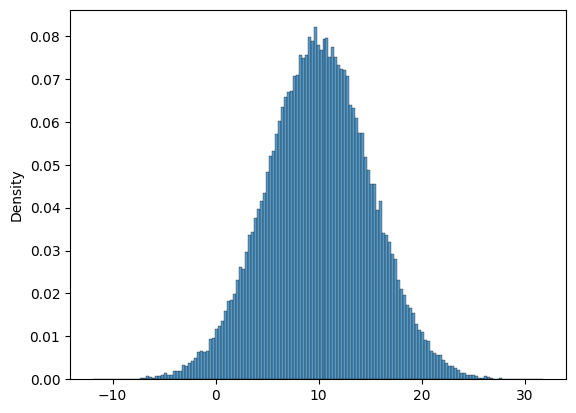

In [3]:
sns.histplot(gaussian_population, stat="density")
plt.show()

## Sampling from the population

Since this lab uses simulated data you could very easily use the whole population to draw conclusions from the data. For instance if you didn't know about the values of $\mu$ and $\sigma$ you could get very close estimates of the true values by computing the mean and standard deviation of the whole population like so:

In [4]:
gaussian_pop_mean = np.mean(gaussian_population)
gaussian_pop_std = np.std(gaussian_population)

print(f"Gaussian population has mean: {gaussian_pop_mean:.1f} and std: {gaussian_pop_std:.1f}")

Gaussian population has mean: 10.0 and std: 5.0


However in real life this will most certainly not be possible and you will need to use samples that are nowhere near as big as the population to draw conclusions of the behaviour of the data.  After all, this is what statistics is all about.

Depending on the sampling techniques you could encounter different properties, this is where the Central Limit Theorem comes in handy. For many distributions (**but not all**) the following is true:

The sum or average of a large number of independent and identically distributed random variables tends to follow a normal distribution, regardless of the distribution of the individual variables themselves. This is important because the normal distribution is well-understood and allows for statistical inference and hypothesis testing.

With this in mind you need a way of averaging samples out of your population. For this the `sample_means` is defined:

In [5]:
def sample_means(data, sample_size):
    # Save all the means in a list
    means = []

    # For a big number of samples
    # This value does not impact the theorem but how nicely the histograms will look (more samples = better looking)
    for _ in range(10_000):
        # Get a sample of the data WITH replacement
        sample = np.random.choice(data, size=sample_size)

        # Save the mean of the sample
        means.append(np.mean(sample))

    # Return the means within a numpy array
    return np.array(means)

Let's break down the function above:

- You take random samples out of the population (the sampling is done with replacement, which means that once you select an element you put it back in the sampling space so you could choose a particular element more than once). This ensures that the independence condition is met.

- Compute the mean of each sample

- Save the means of each sample in a numpy array

The theorem states that if a large enough `sample_size` is used (usually bigger than 30) then the distribution of the sample means should be Gaussian. See it in action by running the next cell:

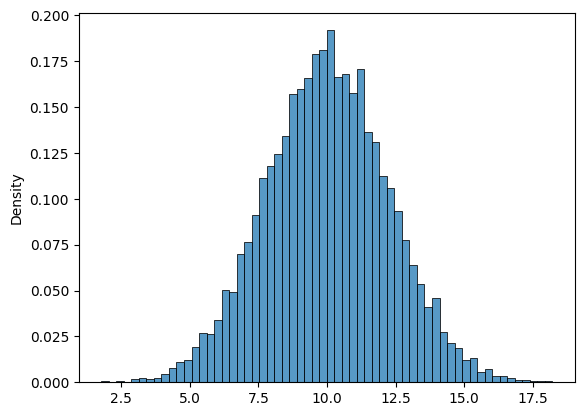

In [6]:
# Compute the sample means
gaussian_sample_means = sample_means(gaussian_population, sample_size=5)

# Plot a histogram of the sample means
sns.histplot(gaussian_sample_means, stat="density")
plt.show()

The distribution of the sample means looks pretty Gaussian. However this is not good enough to determine if the theorem holds, after all you used a very small `sample_size` in this example. There are various ways to check if the sample means do follow a Gaussian distribution.

The first one is to compute the theoretical $\mu$ and $\sigma$ of the sample means which will be denoted with the symbols $\mu_{\bar{X}}$ and $\sigma_{\bar{X}}$ respectively. These values can be computed as follows:

- $\mu_{\bar{X}} = \mu$


- $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$

**Note: In this case $n$ is the size of the sample.**

And then use these values to plot a Gaussian curve with parameters $\mu_{\bar{X}}$ and $\sigma_{\bar{X}}$. If the theorem holds then the resulting distribution of the sample means should resemble this Gaussian curve. Run the next cell to include this into the plot:

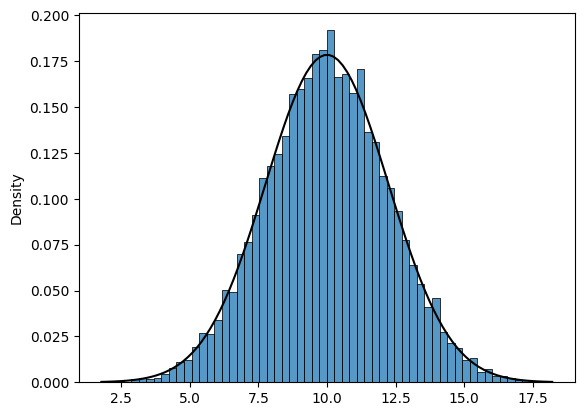

In [7]:
# Compute estimated mu
mu_sample_means = mu

# Compute estimated sigma
# 5 is being used because you used a sample size of 5
sigma_sample_means = sigma / np.sqrt(5)

# Define the x-range for the Gaussian curve (this is just for plotting purposes)
x_range = np.linspace(min(gaussian_sample_means), max(gaussian_sample_means), 100)

# Plot everything together
sns.histplot(gaussian_sample_means, stat="density")
plt.plot(
    x_range,
    norm.pdf(x_range, loc=mu_sample_means, scale=sigma_sample_means),
    color="black",
)
plt.show()

They look pretty similar. However you can go one step further and plot a smooth function that attempts to estimate the probability density function of the sample means through a method known as `kernel density estimation`. If this smooth function resembles the Gaussian function then you know that the distribution of the sample means is very similar to a Gaussian:

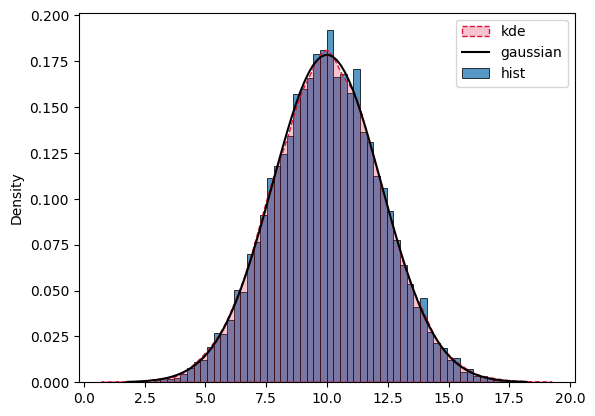

In [8]:
# Histogram of sample means (blue)
sns.histplot(gaussian_sample_means, stat="density", label="hist")

# Estimated PDF of sample means (red)
sns.kdeplot(
    data=gaussian_sample_means,
    color="crimson",
    label="kde",
    linestyle="dashed",
    fill=True,
)

# Gaussian curve with estimated mu and sigma (black)
plt.plot(
    x_range,
    norm.pdf(x_range, loc=mu_sample_means, scale=sigma_sample_means),
    color="black",
    label="gaussian",
)

plt.legend()
plt.show()

Both curves look almost identical!

Another way of checking for normality is to perform a QQ plot of the sample means. The points in this plot should resemble a straight line if the distribution of the data is Gaussian:

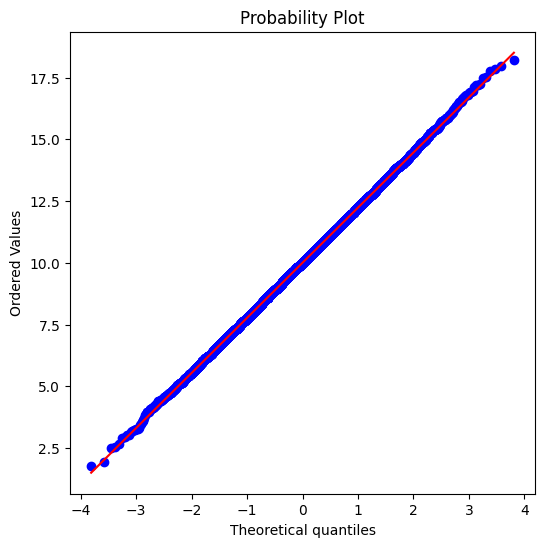

In [9]:
# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(gaussian_sample_means, plot=ax, fit=True)
plt.show()

The resulting QQ plot yields an almost perfect straight line which further confirms that the sample means do follow a Gaussian distribution.

Now, put everything together in an interactive widget to experiment with different values for $\mu$, $\sigma$ and `sample_size`. **To update the plots you will need to click the `Run Interact` button after changing the parameters**:

In [10]:
utils.gaussian_clt()

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='mu', max=50.0, min=0.01, r…

Even with very small values for `sample_size` the sample means follow a Gaussian distribution. This is actually one of the properties of the Gaussian distribution.

Now test the theorem with other distributions!

## Binomial Population

Now try with a population distribution that is not Gaussian. One such distribution is the Binomial distribution which you already saw covered in the lectures. To generate data that follows this distribution you will need to define values for the parameters of `n` and `p`:

In [11]:
n = 5
p = 0.8

binomial_population = np.random.binomial(n, p, 100_000)

The population has a total of 100'000 observations. You can visualize its histogram by running the next cell:

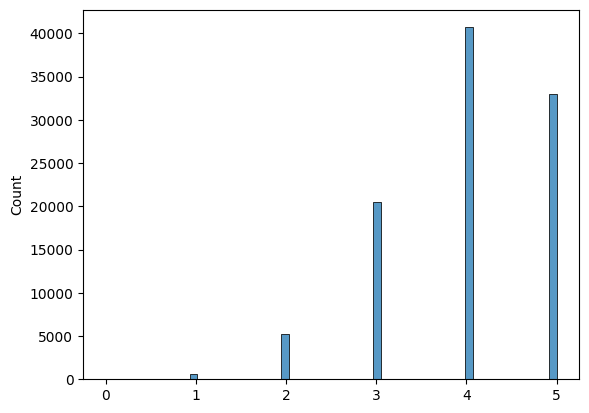

In [12]:
sns.histplot(binomial_population, stat="count")
plt.show()

The mean and standard deviation is not as straightforward as in the Gaussian case (since these parameters were needed to generate the data in that case). However you can easily compute those values by drawing them directly from the population:

In [13]:
binomial_pop_mean = np.mean(binomial_population)
binomial_pop_std = np.std(binomial_population)

print(f"Gaussian population has mean: {binomial_pop_mean:.1f} and std: {binomial_pop_std:.1f}")

Gaussian population has mean: 4.0 and std: 0.9


Once again, in real life you will not have access to the whole population so you need another method to compute this values. Actually the mean and standard deviation of binomal distributions are well defined and can be computed by using the following formulas:

- $\mu = np$


- $\sigma = \sqrt{np(1-p)}$

In [14]:
binomial_pop_mean = n * p
binomial_pop_std = np.sqrt(n * p * (1 - p))

print(f"Gaussian population has mean: {binomial_pop_mean:.1f} and std: {binomial_pop_std:.1f}")

Gaussian population has mean: 4.0 and std: 0.9


Now you have found these same values but without needing to sample the whole population. Nice!

Before seeing the theorem for this case, you should know that there is a rule of thumb to know if the theorem will hold or not for the Binomial distribution case. This condition is the following:

if $min(Np, N(1-p)) >= 5$ then CLT holds

where $N = n*sample\_size$

However, it is important to note that this rule is only a rough guideline, and other factors such as the presence of outliers and the purpose of the analysis should also be taken into consideration when choosing an appropriate statistical method.

Now check the theorem in action. Begin by using a small `sample_size`:

In [15]:
sample_size = 3
N = n * sample_size

condition_value = np.min([N * p, N * (1 - p)])
print(f"The condition value is: {int(condition_value*10)/10:.1f}. CLT should hold?: {True if condition_value >= 5 else False}")

The condition value is: 2.9. CLT should hold?: False


Perform the sampling and compute the theoretical values for the mean and standard deviation of the sample means. Remember these latter two can be computed like so:

- $\mu_{\bar{X}} = \mu$


- $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{sample\_size}}$

In [16]:
# Compute sample means
binomial_sample_means = sample_means(binomial_population, sample_size=sample_size)

# Compute estimated mu
mu_sample_means = n * p

# Compute estimated sigma
sigma_sample_means = np.sqrt(n * p * (1 - p)) / np.sqrt(sample_size)

Visualize the KDE vs Gaussian curve plot and the QQ plot to see how well the theorem is holding:

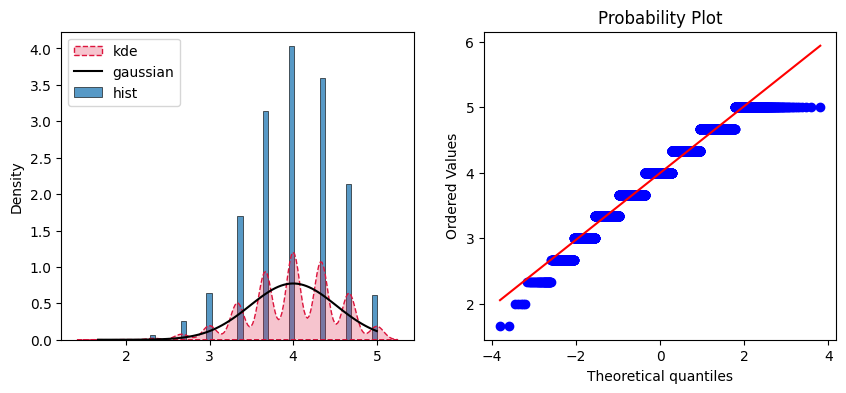

In [17]:
# Create the plots
utils.plot_kde_and_qq(binomial_sample_means, mu_sample_means, sigma_sample_means)

This doesn't look as good as with the Gaussian example. It looks that by using a small `sample_size` the sample means do not follow a Gaussian distribution.

Try again but now increasing the size of each sample:

In [21]:
sample_size = 30
N = n * sample_size

condition_value = np.min([N * p, N * (1 - p)])
print(f"The condition value is: {int(condition_value*10)/10:.1f}. CLT should hold?: {True if condition_value >= 5 else False}")

The condition value is: 29.9. CLT should hold?: True


According to the rule of thumb, the theorem should hold under these conditions. Run the next cell to check if this is true:

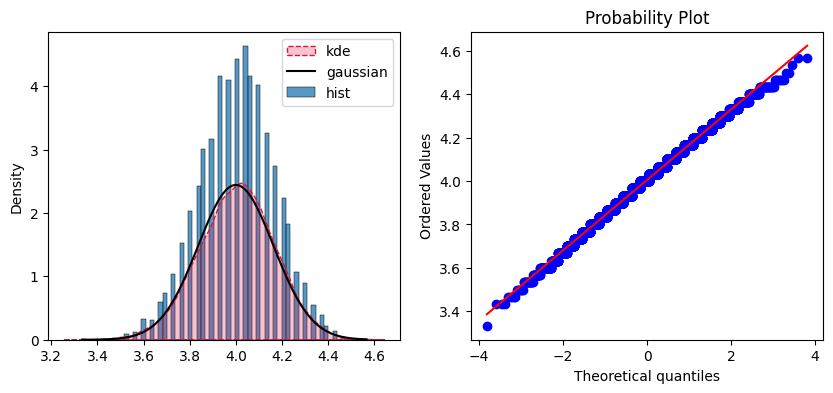

In [22]:
binomial_sample_means = sample_means(binomial_population, sample_size=sample_size)

# Compute estimated mu
mu_sample_means = n * p

# Compute estimated sigma
sigma_sample_means = np.sqrt(n * p * (1 - p)) / np.sqrt(sample_size)

# Create the plots
utils.plot_kde_and_qq(binomial_sample_means, mu_sample_means, sigma_sample_means)

This time everything seems to indicate that the theorem is holding nicely!

As with the previous distribution, by running the next cell you will launch an interactive widget in which you can play around with different values of $n$, $p$ and $sample\_size$. 

See if you can find anything interesting, for instance does the theorem seem to hold better when $p$ is close to 0.5?

In [20]:
utils.binomial_clt()

interactive(children=(IntSlider(value=2, continuous_update=False, description='n', max=50, min=2), FloatSlider…

Keep on going with another distribution!

## Poisson Population

Another popular distribution you might have heard of is the `poisson` distribution. It models the number of events occurring in a fixed interval of time or space, given the average rate of occurrence $\mu$ of those events.

Since you are already familiar with the process of checking the theorem for a distribution you will skip all intermediate steps and jump straight to playing with the interactive widget.

The only thing to consider here is that the mean and standard deviation of this distribution can be computed like this:

- $\mu = \mu$


- $\sigma = \sqrt{\mu}$

In [23]:
utils.poisson_clt()

interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='mu', max=5.0, min=0.01, rea…

As expected, you should see that the bigger the `sample_size` the more closely the distribution of the sample means follows a Gaussian distribution.

## Cauchy Distributions

The Cauchy distribution is not as well-known as the other ones seen throughout this lab. It has heavy tails, which means that the probability of observing extreme values is higher than in other distributions with similar spread. It also does not have a well-defined mean or variance, which makes it less suitable for many statistical applications.

As a result of the properties of this distribution, the central limit theorem does not hold. Run the next cell to generate a population of 1000 points that distribute Cauchy:

In [29]:
cauchy_population = np.random.standard_cauchy(1000)

Now take a look at the histogram of this population:

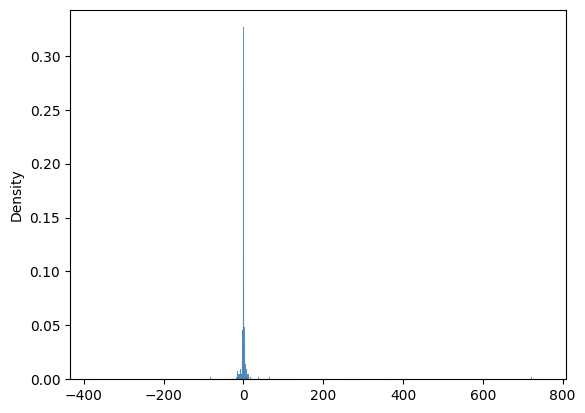

In [30]:
sns.histplot(cauchy_population, stat="density", label="hist")
plt.show()

It is very difficult to even see the histogram due to the extreme values it has. Now compute the sample means with a `sample_size` of 30, which is usually a safe bet for the theorem to hold under other distributions:

In [26]:
cauchy_sample_means = sample_means(cauchy_population, sample_size=30)

Since this distribution has an undefined mean and standard deviation and the histogram is very hard to interpret you will only create the QQ plot for the sample means:

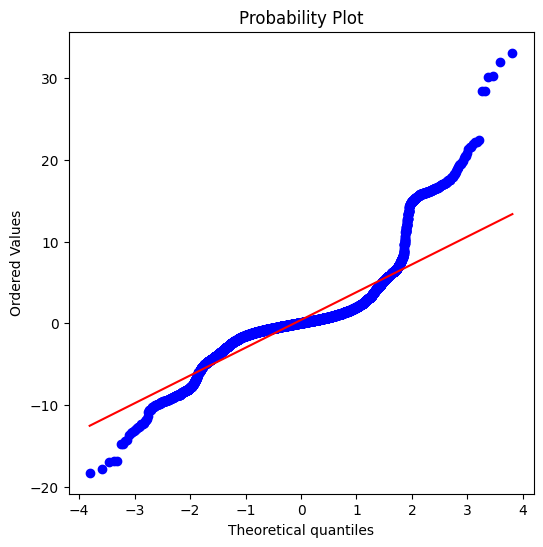

In [27]:
# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(cauchy_sample_means, plot=ax, fit=True)
plt.show()

As you can see, this is very different from a straight line which let's you know that the sample means do not distribute normally. But what if you used a much bigger `sample_size`?

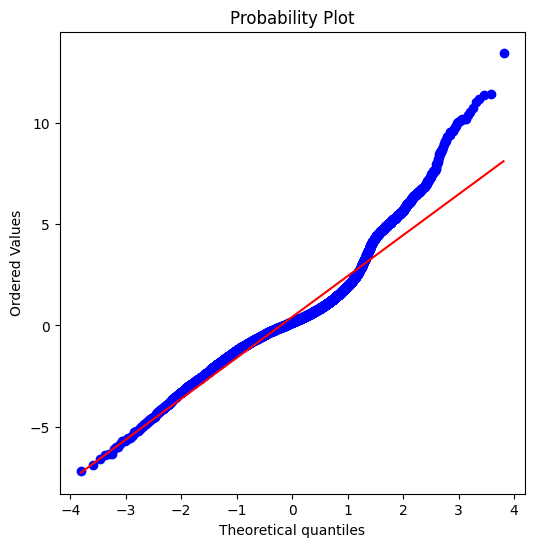

In [28]:
cauchy_sample_means = sample_means(cauchy_population, sample_size=100)

# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(cauchy_sample_means, plot=ax, fit=True)
plt.show()

Even when using a `sample_size` of 100, which might be unrealistic in real-life scenarios you still don't achieve normality for the sample means. This is important because it is a fact that the central limit theorem does not hold for all distributions and that is a limitation to consider when applying it.

**Congratulations on finishing this lab!**